<AxesSubplot:xlabel='balance', ylabel='default'>

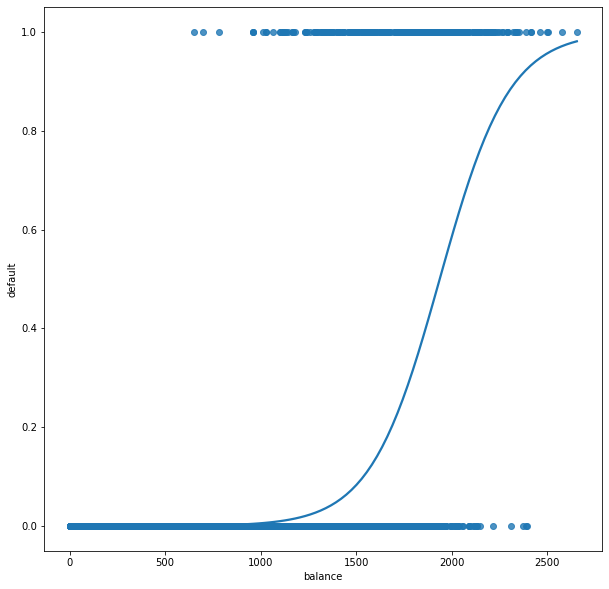

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 設定圖片大小
plt.rcParams['figure.figsize'] = [10, 10]

url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

X = data['balance']
y = data['default']


# 畫 logistic regression 曲線
sns.regplot(x=X, y=y, data=data, logistic=True, ci=None)

In [2]:
data

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


# multi-class, multi-label, multi-task

# multi-class

One-Vs-The-Rest

如果有 n 個類別，我們只需要 n 個二分類器
* 分類器 1 : "貓貓" vs "狗狗，老鼠" ， 用來判斷是不是貓貓
* 分類器 2 : "狗狗" vs "貓貓，老鼠" ， 用來判斷是不是狗狗
* 分類器 3 : "老鼠" vs "貓貓，狗狗" ， 用來判斷是不是老鼠

優點
* 速度快
* 很直覺且可解釋性強

In [3]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

X, y = datasets.load_iris(return_X_y=True)

# 其實 LinearSVC 本身就支援 multi-class，但不支援的只要包 OneVsRestClassifier 就可以 build multi-class model
classifier = LinearSVC(random_state=42)
classifier_ovr = OneVsRestClassifier(classifier).fit(X, y)
classifier_ovr.predict(X)

d:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

One-VS-One

* 分類器 1 : "貓貓" vs "狗狗" → "貓貓"
* 分類器 2 : "貓貓" vs "老鼠" → "貓貓"
* 分類器 3 : "狗狗" vs "老鼠" → "狗狗"

如果有 n 個類別，我們需要 c n 取 2 個二分類器</br>
投票的方式來決定最後的輸出結果，以這個例子來說就是 "貓貓" 勝利</br>
速度比 One-Vs-The-Rest 慢</br>
優點是可以處理複雜度比較高的案例</br>

In [4]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

X, y = datasets.load_iris(return_X_y=True)

classifier = LinearSVC(random_state=42)
classifier_ovo = OneVsOneClassifier(classifier).fit(X, y)
classifier_ovo.predict(X)

d:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Multi-label

假設有三種病 "不乖"，"懶惰"，"憂鬱"，在診斷上每個病人不一定只會歸類到一種病況，也有可能既不乖乖又懶惰還很憂鬱<br>
有一些演算法是不支援 multi-label 的，我們就可以利用 MultiOutputClassifier 這個外殼來支援多標籤的分類器<br>
可以想像成多選題的概念

In [5]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np

X, y1 = make_classification(n_samples=10, n_features=100, n_informative=30, n_classes=3, random_state=42)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)

# 串起來
Y = np.vstack((y1, y2, y3)).T
Y

array([[1, 0, 2],
       [1, 2, 1],
       [0, 2, 0],
       [0, 2, 1],
       [2, 1, 0],
       [0, 0, 0],
       [2, 1, 0],
       [0, 0, 2],
       [1, 1, 2],
       [2, 0, 1]])

In [6]:
n_samples, n_features = X.shape
n_outputs = Y.shape[1] # 3
n_classes = 3

forest = RandomForestClassifier(random_state=42)
forest_multi_label = MultiOutputClassifier(forest)
forest_multi_label.fit(X, Y).predict(X)

array([[1, 0, 2],
       [1, 2, 1],
       [0, 2, 0],
       [0, 2, 1],
       [2, 1, 0],
       [0, 0, 0],
       [2, 1, 0],
       [0, 0, 2],
       [1, 1, 2],
       [2, 0, 1]])

In [7]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_regression(n_samples=10, n_targets=3, random_state=42)

regressor = GradientBoostingRegressor(random_state=42)
regressor_multi_label = MultiOutputRegressor(regressor)
regressor_multi_label.fit(X, y).predict(X)

array([[ 233.53224261,  270.0237017 ,  230.79336937],
       [  19.47696756, -224.96080028,   78.48728246],
       [ 156.98233974,  253.54936778,  158.56822503],
       [   8.4218828 ,   36.67448669,  -66.05849004],
       [  36.97341848,  144.71541475,  110.70862573],
       [ 170.40331558,  397.3003642 ,  353.77011226],
       [-116.47323815, -128.83335621,   40.5485137 ],
       [ -68.9261586 ,  -35.24017033, -135.3853753 ],
       [ 114.87734312,  342.98645582,  135.97942377],
       [  -3.38206043, -170.24630084, -242.012207  ]])

# Multi-task = Multi-output

一般的學習，一次只學習一個任務，無論是上述所提到的分類文章或是分類貓狗，他們實際上都只學習一件事，所以稱作 Single Task Learning（單任務學習)
而 Multi Task Learning，則是將多的相關的（related）任務放在一起學習，在常見的多任務學習網路架構中，他們會共用前半部的參數，以從中習得任務之間的關聯性

選用相同的特徵，產生多個預測輸出</br>
我們要依據一張圖片去判斷裡面的人的性別、人種， 那我們就對性別建一個分類模型，再對人種建立一個分類模型，這樣我們就很自然的完成了多輸出的任務

用在 deep learning 領域</br>
a network trained on multi tasks will have more output layers

多個 tasks 中, 可能包含一般 classification 和 multi-label classification

# 關鍵差異

Multi-Task → the labels compute different losses</br>

Multi-Label → the labels compute a single loss

![multitask](multitask.PNG)